In [ ]:
# Import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

print("All libraries imported successfully")



All libraries imported successfully


In [3]:


df = pd.read_excel("data_45.xlsx")

df.head()

,StoreA,StoreB,Unnamed: 2,Sales in two stores (artificial values in Euros)
0,80.469198,200.578171,NaN,A retail company operates two stores: Store A ...
1,634.536558,542.931067,NaN,NaN
2,544.124517,483.193178,NaN,NaN
3,274.354949,292.099951,NaN,NaN
4,460.786547,426.614466,NaN,NaN


In [4]:
df = df[["StoreA", "StoreB"]]
df.head()

,StoreA,StoreB
0,80.469198,200.578171
1,634.536558,542.931067
2,544.124517,483.193178
3,274.354949,292.099951
4,460.786547,426.614466


In [ ]:
# Descriptive statistics

df.describe()

,StoreA,StoreB
count,20.000000,20.000000
mean,544.164186,471.325548
std,379.392225,250.762314
min,44.383277,84.645704
25%,292.539219,305.858919
50%,448.739037,418.270690
75%,787.856107,641.281398
max,1503.875773,1072.732147


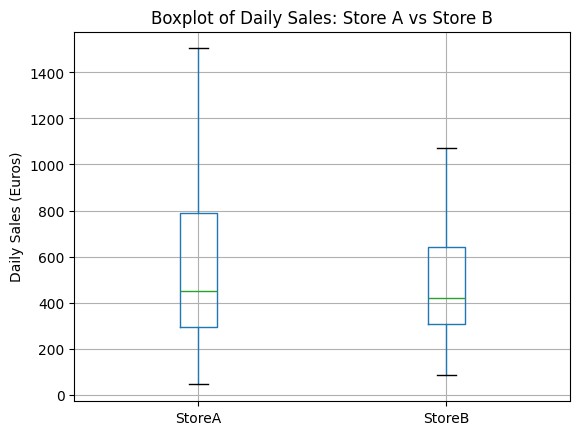

In [ ]:
# Boxplot

df.boxplot()
plt.title("Boxplot of Daily Sales: Store A vs Store B")
plt.ylabel("Daily Sales (Euros)")
plt.show()

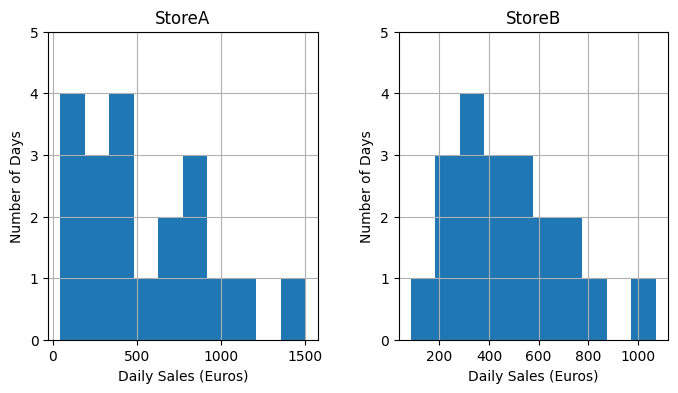

In [ ]:
# Histograms

axes = df.hist(bins=10, figsize=(8,4))

for ax in axes.flatten():
    ax.set_xlabel("Daily Sales (Euros)")
    ax.set_ylabel("Number of Days")
    ax.set_yticks(range(0,6))

plt.show()

In [ ]:
# Shapiro–Wilk normality test

from scipy.stats import shapiro

shapiro_storeA = shapiro(df["StoreA"])
shapiro_storeB = shapiro(df["StoreB"])

shapiro_storeA, shapiro_storeB

(ShapiroResult(statistic=np.float64(0.9398134374962274), pvalue=np.float64(0.23784080296457533)),
 ShapiroResult(statistic=np.float64(0.9620856650829458), pvalue=np.float64(0.586307559984948)))

In [12]:
#F-test for equality of variances

storeA = df["StoreA"]
storeB = df["StoreB"]

variance_A = np.var(storeA, ddof=1)
variance_B = np.var(storeB, ddof=1)

F_stat = variance_A / variance_B

df1 = len(storeA) - 1
df2 = len(storeB) - 1

p_value = 2 * min(stats.f.cdf(F_stat, df1, df2), 1- stats.f.cdf(F_stat, df1,df2))

F_stat, p_value

(np.float64(2.289034375510389), np.float64(0.07890038381783149))

In [ ]:
# Independent samples t-test

from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(df["StoreA"], df["StoreB"], equal_var=True)

t_stat, p_value

(np.float64(0.7162759036015464), np.float64(0.4782001021706802))